In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import h5py

# from scipy.stats import binned_statistic_2d
# from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
import matplotlib
import matplotlib.cm as cm

# from abacusnbody.analysis.tsc import tsc_parallel
import time

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Import packages

sys.path.append('../src/')
# from filter_utils import *
from utils import ksz_from_delta_sigma, arcmin_to_comoving, comoving_to_arcmin
from stacker import SimulationStacker
from halos import select_massive_halos
from mask_utils import get_cutout_indices_3d, sum_over_cutouts

sys.path.append('../../illustrisPython/')
import illustris_python as il # type: ignore

import yaml
import argparse
from pathlib import Path

In [2]:
nPixels = 1000

# sim_type_name = 'IllustrisTNG'
# sim = 'TNG100-1'
# feedback=None
# snapnum = 67

sim_type_name = 'SIMBA'
sim = 'm50n512'
feedback = 's50'
snapnum = 125

In [3]:
stacker = SimulationStacker(sim, snapnum, nPixels, sim_type_name, z=0.5, feedback=feedback)

In [4]:
field = stacker.makeField('gas', nPixels, dim='3D', load=True)

In [5]:
kpcPerPixel = stacker.header['BoxSize'] / field.shape[0] # in comoving kpc/h
# kpcPerPixel = kpcPerPixel / stacker.header['HubbleParam']

haloes = stacker.loadHalos(stacker.simType)
haloMass = haloes['GroupMass']

halo_mask = select_massive_halos(haloMass, 10**(13.22), 5e14) # TODO: make this configurable from user input
haloes['GroupMass'] = haloes['GroupMass'][halo_mask]
haloes['GroupRad'] = haloes['GroupRad'][halo_mask] # in comoving kpc/h
GroupPos_masked = np.round(haloes['GroupPos'][halo_mask] / kpcPerPixel).astype(int)# % nPixels
R200C = np.mean(haloes['GroupRad']) # in comoving kpc/h

In [6]:
field.shape

(1000, 1000, 1000)

In [ ]:
np.where(img == np.max(img))

In [8]:
GroupPos_masked

array([[500, 625, 754],
       [706, 422, 536],
       [591, 821, 235],
       [911, 535, 652],
       [229, 175, 386],
       [253, 291, 789],
       [795, 537, 681],
       [389, 728, 436],
       [311, 367, 903],
       [516, 356, 920],
       [156, 425, 901],
       [388, 477, 214],
       [596, 583, 748],
       [420, 756, 745],
       [155, 227, 175],
       [185, 382, 313],
       [453, 357, 794],
       [323, 366, 956],
       [770, 288, 174],
       [452, 407, 369],
       [282, 439, 829],
       [403, 791, 520],
       [653, 567, 727],
       [781, 282, 289],
       [683, 188, 116],
       [507, 649, 658],
       [870, 527, 747],
       [899, 266, 786],
       [379, 103, 651],
       [144, 475, 431],
       [399, 995, 629],
       [ 64, 202, 193],
       [420, 815, 554],
       [ 53, 447, 557],
       [580, 125, 145],
       [664, 255, 879],
       [467, 334, 779],
       [209, 173, 305],
       [511, 685, 646],
       [120, 461, 457],
       [688, 323, 317],
       [346, 625

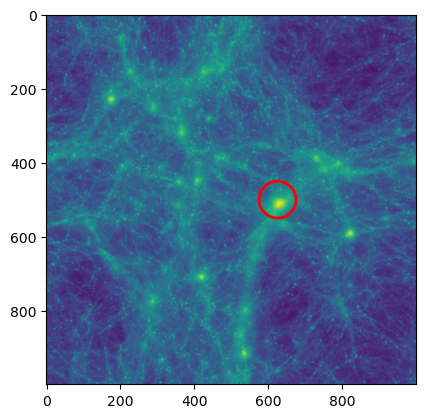

In [10]:
img = np.sum(field, axis=2)

fig, ax = plt.subplots()
ax.imshow(img, origin='upper', norm='log')   # or origin='lower' depending on your coord convention

# center as (x=col, y=row)
# col, row = 600, 400
row, col = GroupPos_masked[0][0], GroupPos_masked[0][1]
radius_pixels = 50

circ = patches.Circle((col, row), radius_pixels, edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(circ)

plt.show()

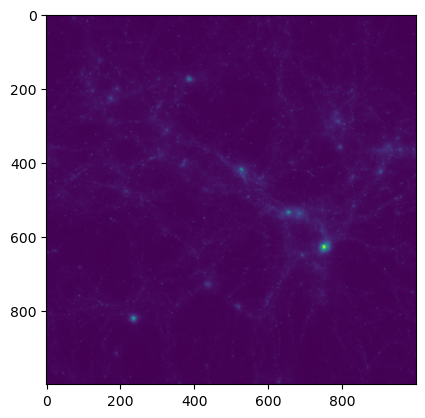

In [7]:
plt.imshow(np.sum(field, axis=0))

In [53]:
haloes['GroupMass'].argmax()

0

In [54]:
GroupPos_masked[0]

array([ 14, 363, 256])